In [1]:
# Install the plugin
# !pip install -e .

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import Permutation
from qiskit.transpiler import PassManager

from qiskit_ibm_transpiler.ai.collection import CollectPermutations
from qiskit_ibm_transpiler.ai.synthesis import AIPermutationSynthesis

## Step 1: Create your circuit

Original circuit -> Depth: 78, Gates(2q): 78


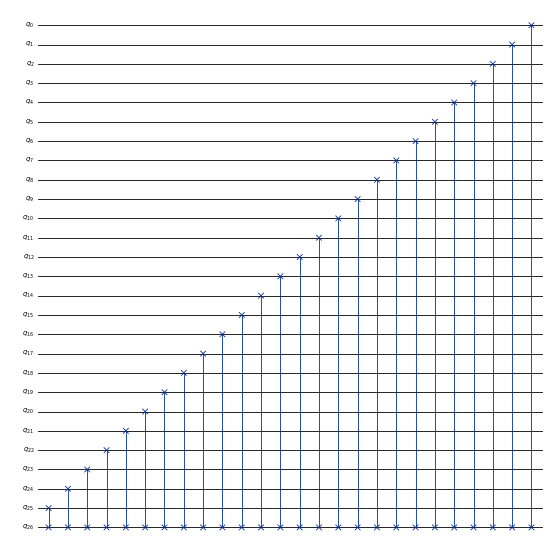

In [3]:
num_qubits = 27
circuit = QuantumCircuit(num_qubits)
circuit.append(
    Permutation(
        num_qubits=num_qubits, pattern=[(i + 1) % num_qubits for i in range(num_qubits)]
    ),
    qargs=range(num_qubits),
)
circuit = circuit.decompose(reps=2)

print(
    f"Original circuit -> Depth: {circuit.decompose(reps=3).depth()}, "
    f"Gates(2q): {circuit.decompose(reps=3).num_nonlocal_gates()}"
)
circuit.draw(output="mpl", fold=-1, scale=0.3, style="iqp")

## Step 2: Optimize your circuit

#### Further optimization with AI Synthesis passes

In [4]:
ai_optimize_perms = PassManager(
    [
        CollectPermutations(do_commutative_analysis=True),
        AIPermutationSynthesis(backend_name="ibm_cairo"),
    ]
)

In [5]:
# AI Synthesis passes respect the coupling map and should run after transpiling
ai_optimized_circuit = ai_optimize_perms.run(circuit)

INFO:qiskit_ibm_transpiler.ai.synthesis:Requesting synthesis to the service
ERROR:qiskit_ibm_transpiler.wrappers.base:No model available for the requested subgraph
ERROR:qiskit_ibm_transpiler.wrappers.base:Qargs do not form a connected subgraph of the backend coupling map
ERROR:qiskit_ibm_transpiler.wrappers.base:Qargs do not form a connected subgraph of the backend coupling map


AI-Optimized circuit -> Depth: 78, Gates(2q): 78


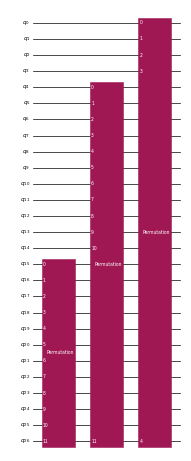

In [6]:
print(
    f"AI-Optimized circuit -> Depth: {ai_optimized_circuit.decompose(reps=3).depth()}, "
    f"Gates(2q): {ai_optimized_circuit.decompose(reps=3).num_nonlocal_gates()}"
)
ai_optimized_circuit.draw(output="mpl", fold=-1, scale=0.25, style="iqp")